1. Za pomoci níže uvedeného kódu naimportujte knihovny a do proměnné url získejte adresu datasetu

```python
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
```

2. Načtete data z proměnné url do pandas dataframe, proměnnou pojmenujte ```df```.
3. Upravte datový typ sloupce ```DATE``` na ```datetime```.
4. Přidejte do ```df``` sloupec ```YEAR``` a ```MONTH```
5. Vypište za pomoci funkce print() datové typy jednotlivých sloupců.

In [14]:
import pandas as pd
# Buňka pro body 1-5
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df.dtypes

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
YEAR                int32
MONTH               int32
dtype: object

6. Filtrujte ```df``` na YEAR >= 2015 a uložte do proměnné ```df_filtrovano```.
7. Upravte ```df_filtrovano```, aby obsahoval sloupce ```DATE```, ```YEAR``` a ```MONTH```, ```PRCP``` 
8. Do proměnné ```df_info``` uložte informaci o počtu řádků a sloupců v ```df_filtrovano```.
9. Vypište prvních 5 řádků ```df_filtrovano```.

In [15]:
# Buňka pro body 6-9	
df_filtrovano = df.loc[df['YEAR']>=2015]
df_filtrovano = df_filtrovano[['DATE','YEAR','MONTH','PRCP']]
df_info  = df_filtrovano.shape
print(df_info)
print(df_filtrovano.head())

(19105, 4)
           DATE  YEAR  MONTH  PRCP
2953 2015-01-01  2015      1   0.0
2954 2015-01-02  2015      1   5.7
2955 2015-01-03  2015      1  43.7
2956 2015-01-04  2015      1   1.8
2957 2015-01-05  2015      1   0.0


10. Do proměnné ```df_agregovano``` agregujte data z ```df_filtrovano``` dle sloupce ```YEAR``` a spočítejte sumu hodnot sloupce ```PRCP```.
11. Seřaďte ```df_agregovano``` vzestupně dle sloupce ```YEAR```.
12. Identifikujte, který rok měl nejvíce srážek a kolik to bylo.
13. Identifikujte, který rok měl nejméně srážek a kolik to bylo.
14. Hodnoty z bodů 12 a 13 vypište za pomoci funkce print()

In [16]:
# Buňka pro body 10-14
df_aregovano  = df_filtrovano.groupby(by='YEAR')['PRCP'].sum()
df_agregovano = df_aregovano.sort_index()
max_hodnota = df_agregovano.max()
rok_max_hodnota = df_agregovano.loc[df_agregovano == max_hodnota]
print(max_hodnota,rok_max_hodnota)

9849.4 YEAR
2017    9849.4
Name: PRCP, dtype: float64


15. Do sloupcového grafu vizualizujte data z ```df_agregovano```
16. Vytvořte pivot tabulku z proměnné ```df``` s indexem ```YEAR```, sloupcem ```NAME```  hodnotou ```PRCP``` a funkcí ```sum```. Uložte do proměnné ```df_pivot```.




NAME    GRAZ  KOSICE  MOSNOV  PIDING  PRAHA KLEMENTINUM  PRAHA LIBUS  RUZYNE  \
YEAR                                                                           
2000   755.3   530.8   502.3     NaN              385.9        163.6   353.9   
2001   534.3   566.4   629.0     NaN              552.0        277.3   499.3   
2002   872.1   648.4   504.4     NaN              661.5        733.6   605.0   
2003   660.8   491.9   448.9     NaN              267.1        275.9   294.8   
2004   899.5   645.8   512.2     NaN              394.2        425.7   472.0   
2005   890.0   701.2   643.8     NaN               80.6        459.1   482.0   
2006   754.1   650.7   548.7    35.8                NaN        500.2   484.0   
2007   826.4   630.9   708.8  1379.2                NaN        520.2   502.2   
2008   950.6   645.2   696.7  1139.8                NaN        494.2   486.0   
2009  1204.3   613.1   710.5  1367.8                NaN        513.5   475.3   
2010   914.4   958.9   896.7  1047.9    

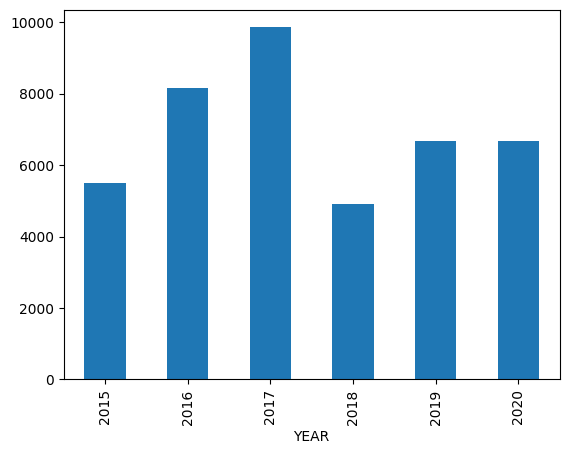

In [17]:
# Buňka pro body 15-16
df_agregovano.plot(kind='bar')
df_pivot = df.pivot_table(index='YEAR',columns='NAME',values='PRCP',aggfunc='sum')
print(df_pivot)

17. Do proměnné df_kategorie vytvořte kopii proměnné ```df```.
18. Za pomoci metody .qcut() vytvořte  do sloupce ```INTERVAL``` intervaly [-np.inf,0,5,10,np.inf] a dejte jim popisky ['neprselo','prselo malo','prselo akorat','prselo moc']
19. Agregujte ```df_kategorie``` dle sloupců ```YEAR```, ```NAME```  a ```INTERVAL``` a spočítejte počet hodnot sloupce ```DATE```.
20. Do proměnné ```df_kategorie_max``` identifikujte, ve kterém ```YEAR``` a ```NAME``` bylo nejvíce položek s hodnotou ```prselo moc```.


In [23]:
# Buňka pro body 17-20
import numpy as np
df_kategorie = df.copy()
df_kategorie['INTERVAL'] = pd.cut(df['PRCP'],[-np.inf,0,5,10,np.inf],labels=['neprselo','prselo malo','prselo akorat','prselo moc'])
df_kategorie = df_kategorie.groupby(by=['YEAR','NAME','INTERVAL'],as_index=False)['DATE'].count()
df_kategorie = df_kategorie.loc[df_kategorie['INTERVAL']=='prselo moc']
max_hodnota = df_kategorie['DATE'].max()
df_kategorie_max = df_kategorie.loc[df_kategorie['DATE'] ==  max_hodnota]
df_kategorie_max



C:\Users\Student\AppData\Local\Temp\ipykernel_4784\3608094079.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_kategorie = df_kategorie.groupby(by=['YEAR','NAME','INTERVAL'],as_index=False)['DATE'].count()


YEAR      NAME    INTERVAL  DATE
671  2016  SALZBURG  prselo moc    64